# Cadeias de Markov e algoritmo de Metropolis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Problema 1 - Matrizes de Markov

Considere um sistema que pode estar num de três estados possíveis: A, B ou C. Estando num determinado estado no instante $t$, tem uma probabilidade de transitar para um outro estado no instante seguinte $t\!+\!\Delta t$. Um exemplo disto é a meteorologia. Se num determinado dia estiver sol, existe uma determinada probabilidade de no dia seguinte estar nublado, ou de chover, ou de continuar a estar sol. Assumindo que o processo é Markoviano, estudemos a dinâmica estocástica do sistema a tempo discreto. <br>

1. Considere que no instante inicial $t=0$, o sistema tem uma probabilidade $p_{i}(0)$ de estar no estado $i$ (onde $i\!=\!A,\!B,\!C$). Estas probabilidades podem ser organizadas no vector linha $$\mathbf{p}\!\left(0\right)=\left[p_{\!\scriptscriptstyle{A}}\!\left(0\right)\!,p_{\scriptscriptstyle{B}}\!\left(0\right)\!,p_{\scriptscriptstyle{C}}\!\left(0\right)\right]$$ de tal forma que a soma dos seus elementos seja 1 (normalização da distribuição de probabilidades de um dado evento no instante inicial).

Considere ainda as seguintes probabilidades de transição num dado passo temporal $t\!\to\! t\!+\!\Delta t$:
- Partindo do estado A temos $p(B,t\!+\!\Delta t|A,t)\!=\!\frac{1}{2}$ e $p(C,t\!+\!\Delta t|A,t)\!=\!\frac{1}{2}$;
- Partindo do estado B temos $p(A,t\!+\!\Delta t|B,t)\!=\!\frac{1}{3}$ e $p(C,t\!+\!\Delta t|B,t)\!=\!\frac{2}{3}$;
- Partindo do estado C temos $p(A,t\!+\!\Delta t|C,t)\!=\!\frac{1}{4}$ e $p(B,t\!+\!\Delta t|C,t)\!=\!\frac{1}{4}$;

Qual é a probabilidade de encontrar o sistema no estado $j$ no primeiro instante da evolução temporal, i.e. $t=\Delta t$? Exprima a resposta na forma de uma equação matricial, $$\mathbf{p}(\Delta t)\!=\!\mathbf{p}(0)\!\cdot\! \mathbb{M},$$
determinando a matriz $\mathbb{M}$. Essa matriz é uma matriz de Markov? Justifique.

**Resposta:** A matriz $\mathbb{M}$ é dada por

$$ \mathbb{M}=\left[\begin{array}{ccc}
0 & \frac{1}{2} & \frac{1}{2}\\
\frac{1}{3} & 0 & \frac{2}{3}\\
\frac{1}{4} & \frac{1}{4} & \frac{1}{2}
\end{array}\right],$$
que se trata de uma matriz de Markov uma vez que a soma das suas linhas é 1 $-$ As probabilidades de saída de cada um dos estados somam a 1. É de notar que está a ser utilizada a convenção que os vectores de probabilidade são multiplicados à esquerda da matriz de Markov, não à direita.

In [3]:
M = np.matrix([[0.0, 1/2, 1/2],
               [1/3, 0.0, 2/3],
               [1/4, 1/4, 1/2]])

print(M)

[[0.         0.5        0.5       ]
 [0.33333333 0.         0.66666667]
 [0.25       0.25       0.5       ]]


2. Se o sistema começar no estado A em $t=0$, qual é a probabilidade de vir a estar no estado $i$ em $t=n\Delta t$? Represente estas probabilidades num só gráfico para $n=[0,1,2,4,8,16]$ e $i\!=\!A,B,C$. Observe se a probabilidade final de cada um dos estados do sistema muda, se este começar em B ou C e comente à luz das propriedades que conhece de um processo de Markov. Verifique que a probabilidade permanece normalizada em virtude das propriedades da matriz de Markov.

**Resposta:**
Para tempos suficientemente longos, o resultado não muda se começar em B ou C. Este comportamento é típico num processo de Markov, onde as probabilidades de transição dependem apenas do estado do sistema no instante imediatamente anterior. Assim, a memória do estado inicial é rapidamente perdida na dinâmica estocástica. Contudo, é de notar que isto nem sempre é verdade. Se a matriz de Markov não for ergódica, é possível que existam várias distribuições de equilíbrio distintas. Portanto, dependendo do estado inicial, a distribuição de equilíbrio pode ser diferente. A matriz de Markov deste exercício é ergódica, por isso tem somente uma distribuição de equilíbrio e qualquer distribuição de probabilidades inicial eventualmente converge para a distribuição de equilíbrio.

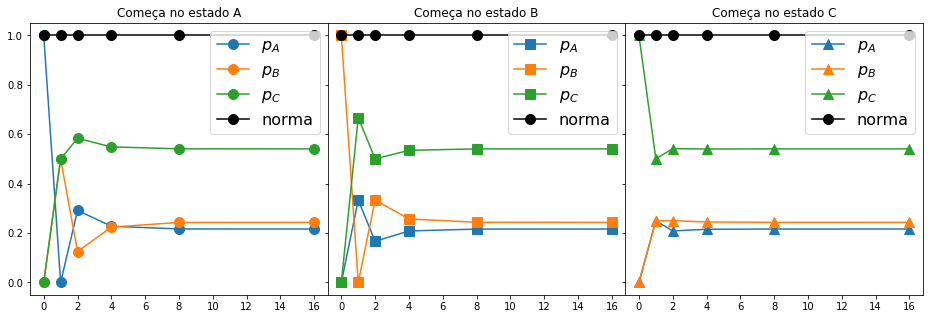

In [13]:
fig, axs = plt.subplots(1, 3, sharey='row',figsize=(16,5))

vec = np.matrix([[1.0, 0.0, 0.0]])
times = [0,1,2,4,8,16]
NT = len(times)

probs = np.zeros([NT, 3])
for t in range(NT):
    probs[t,:] = vec*M**times[t]

axs[0].set_title('Começa no estado A')
axs[0].plot(times, probs[:,0], 'o-',markersize=10.0,label=r'$p_A$')
axs[0].plot(times, probs[:,1], 'o-',markersize=10.0,label=r'$p_B$')
axs[0].plot(times, probs[:,2], 'o-',markersize=10.0,label=r'$p_C$')
axs[0].plot(times, probs[:,0]+probs[:,1]+probs[:,2], 'ko-',
            markersize=10.0,label='norma')

vec = np.matrix([[0.0, 1.0, 0.0]])
times = [0,1,2,4,8,16]
NT = len(times)

probs = np.zeros([NT, 3])
for t in range(NT):
    probs[t,:] = vec*M**times[t]
  
axs[1].set_title('Começa no estado B')
axs[1].plot(times, probs[:,0], 's-',markersize=10.0,label=r'$p_A$')
axs[1].plot(times, probs[:,1], 's-',markersize=10.0,label=r'$p_B$')
axs[1].plot(times, probs[:,2], 's-',markersize=10.0,label=r'$p_C$')
axs[1].plot(times, probs[:,0]+probs[:,1]+probs[:,2], 'ko-',
            markersize=10.0,label='norma')

vec = np.matrix([[0.0, 0.0, 1.0]])
times = [0,1,2,4,8,16]
NT = len(times)

probs = np.zeros([NT, 3])
for t in range(NT):
    probs[t,:] = vec*M**times[t]
    
axs[2].set_title('Começa no estado C')
axs[2].plot(times, probs[:,0], '^-',markersize=10.0,label=r'$p_A$')
axs[2].plot(times, probs[:,1], '^-',markersize=10.0,label=r'$p_B$')
axs[2].plot(times, probs[:,2], '^-',markersize=10.0,label=r'$p_C$')
axs[2].plot(times, probs[:,0]+probs[:,1]+probs[:,2], 'ko-',
            markersize=10.0,label='norma')


axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[2].legend(fontsize=16)
plt.subplots_adjust(wspace=0)
plt.show()

3. Repita a análise anterior, mas partindo de um estado misto do sistema $-$ $\mathbf{p}(0)\!=\![0.3,0.6,0.1]$.

**Resposta:** Tal como na alínea anterior, a distribuição tende para a mesma distribuição de equilíbrio e a probabilidade permanece normalizada.

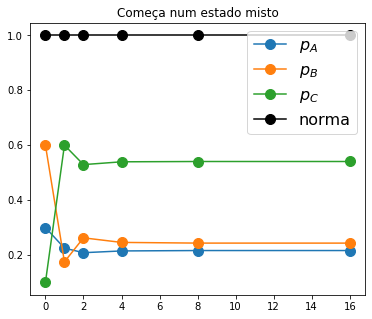

In [8]:
fig, axs = plt.subplots(figsize=(6,5))

vec = np.matrix([[0.3, 0.6, 0.1]])
times = [0,1,2,4,8,16]
NT = len(times)

probs = np.zeros([NT, 3])
for t in range(NT):
    probs[t,:] = vec*M**times[t]

axs.set_title('Começa num estado misto')
axs.plot(times, probs[:,0], 'o-',markersize=10.0,label=r'$p_A$')
axs.plot(times, probs[:,1], 'o-',markersize=10.0,label=r'$p_B$')
axs.plot(times, probs[:,2], 'o-',markersize=10.0,label=r'$p_C$')
axs.plot(times, probs[:,0]+probs[:,1]+probs[:,2], 'ko-',
            markersize=10.0,label='norma')


axs.legend(fontsize=16)
plt.subplots_adjust(wspace=0)
plt.show()

4. Calcule os valores próprios desta matriz $\mathbb{M}$ e os vectores próprios à esquerda e à direita, numericamente. Prove que os vectores próprios da matriz $\mathbb{M}$ associados a valores próprios distintos são ortogonais entre si (no sentido apropriado) e verifique isto numericamente. Qual o significado dos vectores próprios com valor próprio 1?

**Resposta:** O vector próprio associado ao valor próprio 1 é proporcional à distribuição de equilíbrio (ou assimptótica).

In [11]:
# Careful with normalization
vals, Rvecs = np.linalg.eig(M)
vals, Lvecs = np.linalg.eig(M.transpose())

print("Valores Próprios:\n")
print(vals)
print("\n\nVectores Próprios à Direita (Colunas):\n")
print(Rvecs)
print("\n\nVectores Próprios à Esquerda (Colunas):\n")
print(Lvecs)

Metrica = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        Metrica[i,j] = np.dot(Lvecs[:,i].transpose(),Rvecs[:,j]).round(10)
print("\n\nA métrica da base própria é dada por:\n")       
print(Metrica)

print("\n\nA distribuição de probabilidades assimptótica é:\n")
Probability = Lvecs[:,0].transpose()/sum(Lvecs[:,0])
print(Probability)

Valores Próprios:

[ 1.         -0.39433757 -0.10566243]


Vectores Próprios à Direita (Colunas):

[[-0.57735027 -0.81483536 -0.83770574]
 [-0.57735027  0.57582953 -0.28737135]
 [-0.57735027  0.06681085  0.4643994 ]]


Vectores Próprios à Esquerda (Colunas):

[[ 0.34268235  0.4695354  -0.29534525]
 [ 0.38551764 -0.81325917 -0.51155297]
 [ 0.85670587  0.34372377  0.80689822]]


A métrica da base própria é dada por:

[[-0.91504583 -0.          0.        ]
 [-0.         -0.82792821 -0.        ]
 [ 0.          0.          0.76914113]]


A distribuição de probabilidades assimptótica é:

[[0.21621622 0.24324324 0.54054054]]


5. Os outros valores próprios também têm um significado importante para a dinâmica estocástica do sistema. Considere $\mathbb{N}$ uma matriz de Markov diagonalizável sendo $v_i$ o seu único vector próprio à esquerda de valor próprio $\lambda_i$. Descreva $\mathbf{p}(0)$ como uma combinação dos $v_i$ e use isso para encontrar uma expressão analítica para $p(n\Delta t)$. Ordenando os valores próprios pela magnitude do seu módulo (assumindo que são todos distintos): $\lambda_1 > \lambda_2 > \lambda_3 > ... $, escreva a lei de decaimento assimptótico para a distribuição de equilíbrio quando $t\rightarrow \infty$

**Resposta:** Podemos começar por escrever $\mathbf{p}(0)$ como a seguinte combinação linear de vectores próprios $v^{l}_i$:

\begin{equation}
    \mathbf{p}(0)\! =\!\! \sum_{i}\!p_{i}v^{l}_i,
\end{equation}
de tal modo que 

\begin{equation}
            p_{i}\! =\! \frac{v^{r}_{i}\!\cdot\! \mathbf{p}(0)}{v^{r}_{i}\!\cdot\! v^{l}_{i}}.
\end{equation}

Então, a acção da matriz da Markov $\mathbb{N}$ em $\mathbf{p}(0)$ por $n$ passos consecutivos é dada por

\begin{equation}
    \mathbf{p}(n\Delta t)\! =\! \mathbf{p}(0)\!\cdot\!\mathbb{N}^n \!= \!\! \sum_{i}\!p_{i}v^{l}_{i}\!\cdot\!\mathbb{N}^n \!= \!\! \sum_{i}\!\left[p_{i}\lambda_{i}^n\right]v^{l}_{i},
\end{equation}

Isto significa que o vector $\mathbf{p}(n\Delta t)$ tende para $p_{1}v^{l}_1$ no limite $n\!\to\! \infty$. Note-se que $\lambda_{1}=1$, forçosamente.  Sendo que todos os outros valores próprios são em geral números complexos de módulo menor que $1$, o decaímento assimptótico do vector $\mathbf{p}(n\Delta t)$ é dado por

\begin{equation}
        \mathbf{p}(n\Delta t)\!\underset{n\!\to\! \infty}{\longrightarrow}\! p_{1}v^{l}_{1} + p_{2}v^{l}_{2}e^{n\ln |\lambda_{2}|} + \mathcal{O}[e^{n\ln |\lambda_{3}|}], 
\end{equation}

o que nos permite identificar $\tau\! =\!-\frac{1}{ln|\lambda_{2}|}$ como a escala de decaímento assimptótico.


6. Vamos agora abordar o problema de um modo diferente mas equivalente. Considere que no instante $t=n\Delta t$ o sistema está no estado $I$. Então, será lançado um número aleatório para decidir em que estado o sistema estará no instante seguinte $t=(n+1)\Delta t$. Por exemplo, nas condições do exercício, se o sistema estiver no estado $A$, terá uma probabilidade $0.5$ de ir para $B$ e uma probabilidade $0.5$ de ir para $C$. Este processo é iterado ao longo de muitos tempos para obter um percurso nos estados $I$ do sistema ao longo do tempo $I(t)$. Exemplo de um percurso: $A,B,B,B,C,C,A,B,A,C,C,C,\cdots$. <br><br>

Implemente esta dinâmica sabendo que o sistema começa no estado $A$. Olhando para o estado do sistema nos instantes $n=[0,1,2,4,8,16]$ para muitos percursos, faça um histograma dos estados em cada um desses tempos e compare com a alínea 2. O que conclui?<br><br>

**Resposta:** O histograma calculado com o formalismo das matrizes de Markov é idêntico ao encontrado por este método.

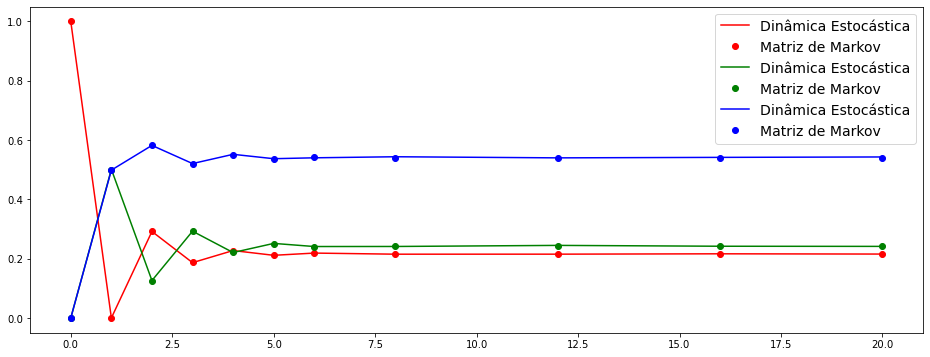

In [12]:
# Método da Dinâmica Estocástica

def iteration(state):
    r = np.random.random()
    next_state = state    
    # State A
    if state == 0:
        if 0 < r < 1/2:
            next_state = 1
        else:
            next_state = 2               
    # State B
    elif state == 1:
        if 0 < r < 1/3:
            next_state = 0
        else:
            next_state = 2      
    # State C
    elif state == 2:
        if 0 < r < 1/4:
            next_state = 0
        elif 1/4 <= r < 1/2:
            next_state = 1
        else:
            next_state = 2         
    return next_state

def SingleRandomWalk(state,times):
    final_state_list = times.copy()*0
    final_state_list[0] = state
    for i in range(1,len(times)):
        for t in range(int(times[i]-times[i-1])):
            state = iteration(state)
        final_state_list[i] = state
    return final_state_list;


times = np.array([0,1,2,3,4,5,6,8,12,16,20]) # Lista de Tempos a Simular
NMAX = 50000                                 # Número de Dinâmicas Independentes
state = 0
Frequencias = np.zeros((3,len(times)))

for n in range(NMAX):
    TimeSeries = SingleRandomWalk(state,times)
    for i in range(len(TimeSeries)):
        Frequencias[TimeSeries[i],i] += 1

Frequencias /= NMAX

# Método da Matriz de Markov (Repetição para Comparação)

M = np.matrix([[0.0, 1/2, 1/2],
               [1/3, 0.0, 2/3],
               [1/4, 1/4, 1/2]])

vec = np.matrix([[1.0, 0.0, 0.0]])
probs = np.zeros([len(times), 3])
for t in range(len(times)):
    probs[t,:] = vec*M**times[t]


colors = ['r','g','b']
plt.figure(figsize=(16,6))
for i in range(3):
    col = colors[i]
    plt.plot(times,Frequencias[i,:], col,label="Dinâmica Estocástica")
    plt.plot(times, probs[:,i],col+'o',label="Matriz de Markov")
    
plt.legend(fontsize=14)
plt.show()

7. As matrizes de Markov podem ter propriedades muito distintas das discutidas nas alíneas anteriores, dependendo dos seus elementos de matriz. Considere, a título de exemplo, as seguintes matrizes de Markov 

$$ \mathbb{M}_{1}=\left[\begin{array}{ccc}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{array}\right] $$

$$ \mathbb{M}_{2}=\left[\begin{array}{ccc}
0.98 & 0.02 & 0\\
0 & 0.98 & 0.02\\
0.02 & 0 & 0.98
\end{array}\right] $$

$$ \mathbb{M}_{3}=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 0.3 & 0.7\\
0 & 0.6 & 0.4
\end{array}\right] $$


7.1. Represente, no mesmo gráfico, a probabilidade do sistema tomar o estado A no instante $t=n\Delta t$ dado que começou no estado A em $t=0$ para cada uma das matrizes. Use $n$ entre $0$ e $80$.

**Resposta:**

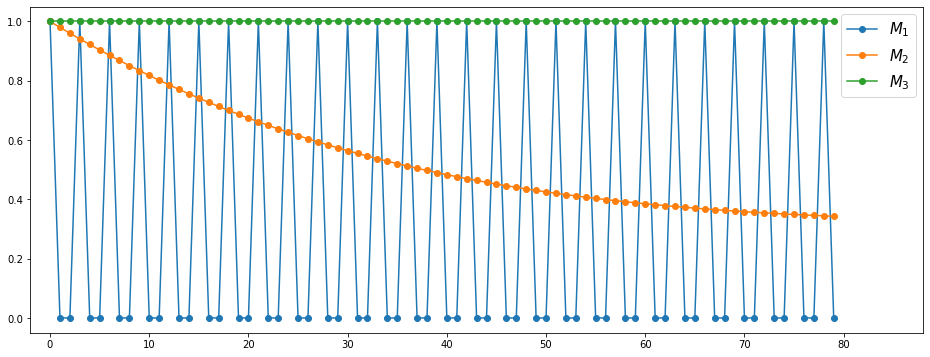

In [15]:
M1 = np.matrix([[0.0, 1.0, 0.0],
                [0.0, 0.0, 1.0],
                [1.0, 0.0, 0.0]])

M2 = np.matrix([[0.98, 0.02, 0.00],
                [0.00, 0.98, 0.02],
                [0.02, 0.00, 0.98]])

M3 = np.matrix([[1.0, 0.0, 0.0],
                [0.0, 0.3, 0.7],
                [0.0, 0.6, 0.4]])

vec = np.matrix([[1.0, 0.0, 0.0]])
times = range(80)
NT = len(times)

probs1 = np.zeros([NT, 3])
probs2 = np.zeros([NT, 3])
probs3 = np.zeros([NT, 3])

for t in range(NT):
    probs1[t,:] = vec*M1**times[t]
    probs2[t,:] = vec*M2**times[t]
    probs3[t,:] = vec*M3**times[t]

plt.figure(figsize=(16,6))
plt.plot(times, probs1[:,0],'-o',label=r'$M_1$')
plt.plot(times, probs2[:,0],'-o',label=r'$M_2$')
plt.plot(times, probs3[:,0],'-o',label=r'$M_3$')
plt.legend(fontsize=15)
plt.xlim([-2,88])
plt.show()

7.2. Repita o cálculo mas representando a probabilidade de o sistema estar no estado C dado que começou em B. Como se comparam os percursos e as velocidades de convergência para equilíbrio para cada uma das matrizes com as da alínea anterior?

**Resposta:** A matriz $M_1$ dá origem a um movimento oscilatório, como pode ser visto por $M_1^3=1$. $M_2$ dá origem a uma dinâmica que converge lentamente, enquanto $M_3$ converge muito rapidamente. Na alínea anterior, a dinâmica devido à matriz $M_3$ fez com que um percurso que começou no estado A permanecesse no estado A. Neste alínea, o percurso começou no estado B e já não ficou no estado B, tendo evoluido para um estado misto de B com C.

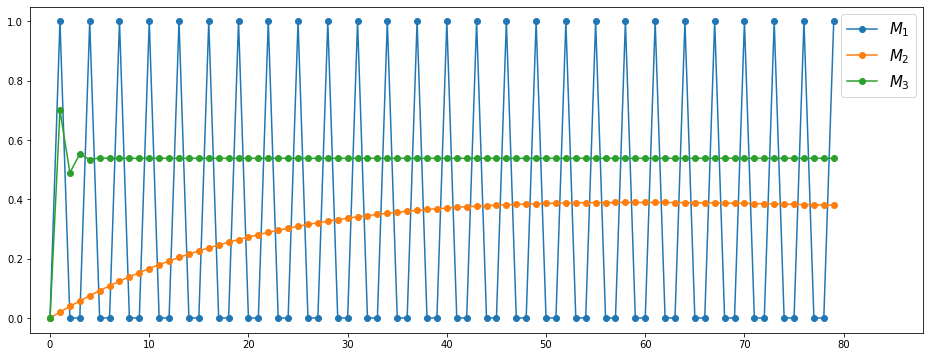

In [9]:
times = range(80)
NT = len(times)

probs1 = np.zeros([NT, 3])
probs2 = np.zeros([NT, 3])
probs3 = np.zeros([NT, 3])
vec = np.matrix([[0.0, 1.0, 0.0]])

for t in range(NT):
    probs1[t,:] = vec*M1**times[t]
    probs2[t,:] = vec*M2**times[t]
    probs3[t,:] = vec*M3**times[t]

plt.figure(figsize=(16,6))
plt.plot(times, probs1[:,2],'-o',label=r'$M_1$')
plt.plot(times, probs2[:,2],'-o',label=r'$M_2$')
plt.plot(times, probs3[:,2],'-o',label=r'$M_3$')
plt.legend(fontsize=15)
plt.xlim([-2,88])
plt.show()


7.3. Calcule os valores e vectores próprios (à esquerda) de cada uma e use-os para comentar as propriedades que constatou nas últimas duas alíneas. Caracterize a ergodicidade e estados de equilibrio das dinâmicas de Markov descritas por estas matrizes.

**Resposta:** <br>
1. Todos os valores próprios de $M_1$ têm módulo 1, o que justifica o seu comportamento oscilatório. Contudo, apenas tem um valor próprio exactamente igual a 1, logo existe apenas uma distribuição de equilíbrio. <br>
2. Apenas um dos valores próprios de $M_2$ tem módulo 1, mas os outros dois estão muito próximos de 1. Esta proximidade é o que justifica a convergência lenta para a distribuição de equilíbrio.<br>
3. A matriz $M_3$ tem dois valores próprios idênticos a 1, logo existem duas distribuições de equilíbrio.

In [16]:
vals1, Rvecs1 = np.linalg.eig(M1.transpose())
vals2, Rvecs2 = np.linalg.eig(M2.transpose())
vals3, Rvecs3 = np.linalg.eig(M3.transpose())
print("Os valores Próprios da Matriz M1 são (valor absoluto e fase complexa):\n")
print(np.abs(vals1))
print(np.angle(vals1)/np.pi)
print("\n\nOs valores Próprios da Matriz M2 são (valor absoluto e fase complexa):\n")
print(np.abs(vals2))
print(np.angle(vals2)/np.pi)
print("\n\nOs valores Próprios da Matriz M3 são (valor absoluto e fase complexa):\n")
print(np.abs(vals3))
print(np.angle(vals3)/np.pi)


Os valores Próprios da Matriz M1 são (valor absoluto e fase complexa):

[1. 1. 1.]
[ 0.66666667 -0.66666667  0.        ]


Os valores Próprios da Matriz M2 são (valor absoluto e fase complexa):

[0.97015463 0.97015463 1.        ]
[ 0.0056832 -0.0056832  0.       ]


Os valores Próprios da Matriz M3 são (valor absoluto e fase complexa):

[1.  0.3 1. ]
[0. 1. 0.]


# Problema 2 - Passeio aleatório
No problema anterior, estudámos as propriedades de matrizes de Markov com três estados possíveis. Não obstante, podemos generalizar este conceito para um número arbitrário $N$ de estados. Neste contexto, as matrizes de Markov são bastante úteis para descrever passeios aleatórios. Considere uma partícula (Browniana) numa caixa e imersa em fluído, estando constantemente a ser bombardeada por moléculas. Para simplificar, vamos assumir que esta só se pode mover no eixo dos $xx$ e que o espaço está discretizado e limitado nas posições $i$, para $i={0,1,2,...,99}$. <br><br>

Como o movimento da partícula é imprevisível, vamos descrevê-lo numa abordagem estocástica: Se no instante $t$, esta estiver na posição $i$, tem uma probabilidade $p_L$ de se mover para $i-1$, $p_R$ de ir para $i+1$ e $p_s$ de ficar no mesmo sítio, no instante seguinte ($t\!+\!\Delta t$). Nas fronteiras da "caixa" a situação é ligeiramente diferente. Nomeadamente, se estiver em $i=0$, tem probabilidade $p_R$ de ir para a direita e $1-p_R$ de ficar no mesmo sítio. Se estiver em $i=99$, tem probabilidade $p_L$ de ir para a esquerda e $1\!-\!p_{L}$ de permanecer no mesmo sítio. Deste modo, as fronteiras da caixa são paredes impenetráveis.

1. Considerando $p_R\!=\!p_L\!=\!0.3$ e $p_s\!=\!0.4$, calcule a matriz de Markov que descreve este processo. Note que esta matriz tem dimensão $100\!\times\!100$.

**Resposta:**

In [4]:
pR = 0.3
pL = pR
ps = 1 - pR - pL
N = 100
M = np.zeros([N, N])
for i in range(1,N-1):
    M[i,i] = ps
    M[i,i+1] = pR
    M[i,i-1] = pL    
M[0,1] = pR
M[0,0] = 1-pR
M[N-1, N-2] = pL
M[N-1, N-1] = 1-pL

print("A Matriz de Markov deste Passeio Aleatório é dada por:\n")
print(M)

A Matriz de Markov deste Passeio Aleatório é dada por:

[[0.7 0.3 0.  ... 0.  0.  0. ]
 [0.3 0.4 0.3 ... 0.  0.  0. ]
 [0.  0.3 0.4 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.4 0.3 0. ]
 [0.  0.  0.  ... 0.3 0.4 0.3]
 [0.  0.  0.  ... 0.  0.3 0.7]]


2. Assumindo que a partícula começa em $i=50$, calcule a distribuição de probabilidades da sua posição para $t=n\Delta t $ onde $n\!=\![10,100,500,1000,10000]$. A partir do comportamento observado, como caracterizaria o espalhamento de um conjunto de partículas independentes colocadas no centro da caixa a $t=0$? Meça **a evolução temporal do afastamento quadrático médio desta nuvem de partículas ao centro** da caixa e use essa análise para validar a sua intuíção.

**Resposta:** Este comportamento pode ser visto como o espalhamento de partículas de gás que inicialmente estavam aglomeradas no mesmo sítio, e a distribuição de probabilidades pode ser interpretada como a densidade de partículas. Como não há qualquer enviesamento na dinâmica, ao final de muito tempo, espera-se que as partículas estejam uniformemente distribuídas em todo o espaço. Isto verifica-se passadas 10000 iterações. O desvio quadrático médio em cada instante é o desvio padrão da densidade de partículas nesse instante, e tende para o desvio padrão da distribuição uniforme: $\sigma=L/\sqrt{12}=28.9$

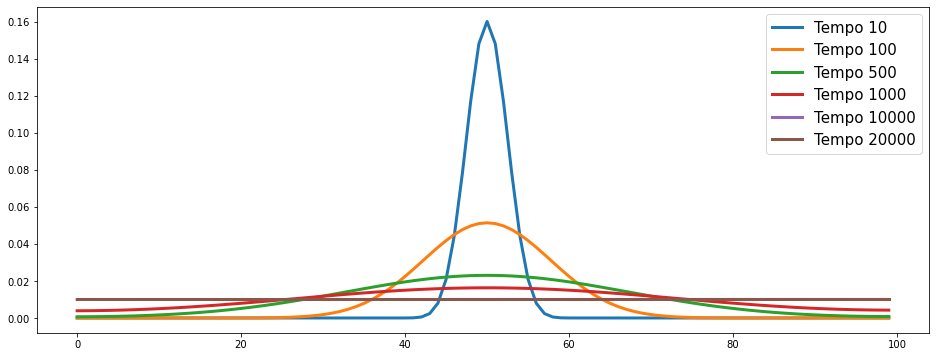

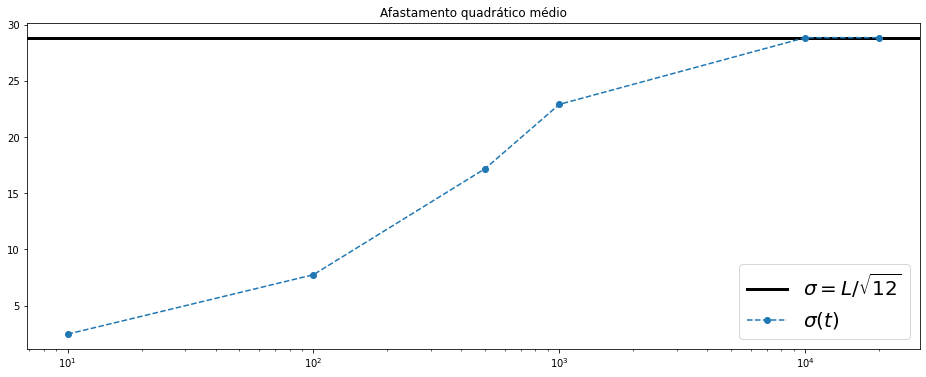

In [9]:
# Falta Representar a Posição média + barras de erro como função do tempo.

times = [10,100,500,1000,10000, 20000]
NT = len(times)

vecs  = np.zeros([N,NT])
vecs0 = np.matrix(np.zeros([1, N]))
i0 = 50
vecs0[0, i0] = 1.0

for i in range(NT):
    vecs[:,i] = vecs0*np.matrix(M)**times[i]

plt.figure(figsize=(16,6))
for i in range(NT):
    plt.plot(vecs[:,i],linewidth=3.0,label="Tempo %d"%times[i])
plt.legend(fontsize=15)
plt.show()
positions = np.linspace(0,N-1, N)


# Calculo do afastamento quadrático médio
desvios = np.zeros(NT)
for i in range(NT):
    desvios[i] = np.sqrt(np.sum(vecs[:,i]*(positions - N//2)**2))
    
plt.figure(figsize=(16,6))
plt.title("Afastamento quadrático médio")
plt.axhline(N/np.sqrt(12), color='k', linewidth=3, label="$\sigma=L/\sqrt{12}$")
plt.plot(times, desvios, 'o--', label="$\sigma(t)$")
plt.xscale('log')
plt.legend(fontsize=20)
plt.show()

3. Considere que a partícula está sujeita a um potencial atractivo que torna mais difícil esta abandonar o sítio onde está, quanto mais próxima do centro deste potencial. Neste caso, as probabilidades de transição passam a depender da posição, embora ainda possamos assumir $p_R = p_L$. Concretamente, consideraremos que $p_s\! =\! 1\!-\!p_{R}\!-\!p_{L}\! =\! f(i)$ onde $f(i)$ é uma função da posição. Usando
\begin{equation}
    f(i) = A + B\exp\left(-\frac{(i-i_0)^2}{\sigma^2}\right)
\end{equation}
onde $A\!=\!0.5$, $B=0.4$, $\sigma\!=\!50$ e $i_0 \!=\!70$ calcule a distribuição de probabilidades da sua posição para $t\!=\! n\Delta t $ onde $n\!=\![100,500,1000,10000,100000]$. Represente a evolução da posição média da partícula como função do tempo.

**Resposta:**

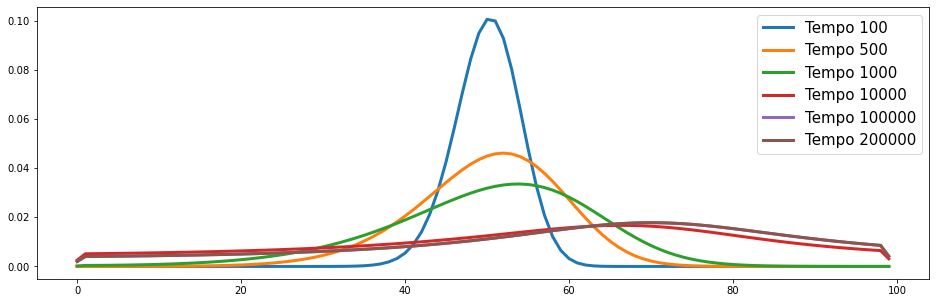

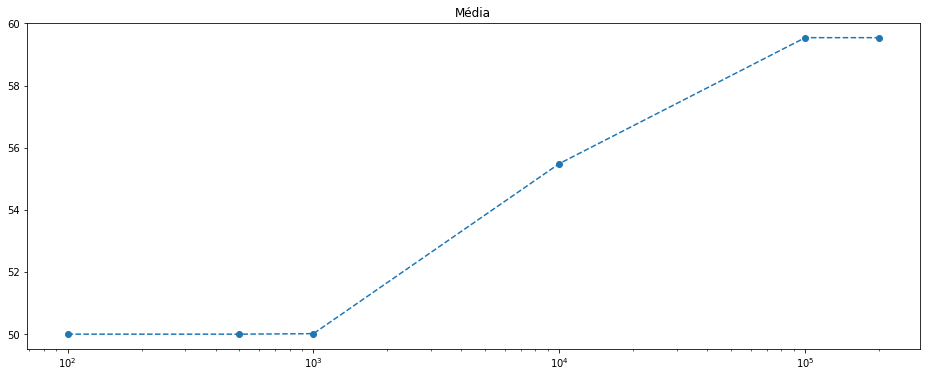

In [43]:
# Parâmetros do problema
N = 100
n0 = 70
sigma = 50
A = 0.5
B = 0.4

def f(n,n0):
    return A + B*np.exp(-(n-n0)**2/sigma**2)

xs = np.linspace(0,100,N)
ys = f(xs,n0)



#Construção da Matriz de Markov
M = np.zeros([N, N])
for i in range(N):
    ps = f(i,n0)
    M[i,i] = ps
    if(i>0 and i<N-1):
        M[i,(i+1)%N] = (1 - ps)/2
        M[i,(i-1)%N] = (1 - ps)/2
    if(i == 0):
        M[0,1] = (1 - ps)
    if(i == N-1):
        M[N-1,N-2] = (1 - ps)
        
    
# Visualização dos dados
times = [100,500,1000,10000,100000, 200000]
NT = len(times)

vecs  = np.zeros([N,NT])
vecs0 = np.matrix(np.zeros([1, N]))
i0 = 50
vecs0[0, i0] = 1.0

for i in range(NT):
    vecs[:,i] = vecs0*np.matrix(M)**times[i]

plt.figure(figsize=(16,5))
for i in range(NT):
    plt.plot(vecs[:,i],linewidth=3.0,label="Tempo %d"%times[i])
plt.legend(fontsize=15)
plt.show()



# Calculo do afastamento quadrático médio
media = np.zeros(NT)
for i in range(NT):
    media[i] = np.sum(vecs[:,i]*positions)
    
plt.figure(figsize=(16,6))
plt.title("Média")
plt.plot(times, media, 'o--')
plt.xscale('log')
plt.show()

4. As matrizes de Markov são úteis para descrever passeios aleatórios mas também podem servir para gerar números aleatórios com uma determinada distribuição (a distribuição de equilíbrio). Escolhendo cuidadosamente os elementos de matriz da matriz de Markov, é possível obter uma distribuição de equilíbrio arbitrária. Considere a seguinte matriz de Markov:

$$ \mathbb{M}=\left[\begin{array}{cccccccc}
M_{11} & p_{R} & 0 & \cdots & 0 & p_{c}\\
p_{L} & M_{22} & p_{R} & \cdots & 0 & 0\\
0 & p_{L} & M_{33} & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots  & \vdots & \vdots\\
0 & 0 & 0 & \cdots & M_{N-1,N-1} & p_{R}\\
p_{L} & 0 & 0 & \cdots & p_{L} &M_{NN}
\end{array}\right]$$

onde $p_R=\frac{1}{2}\exp(-\lambda)$, $p_L=\frac{1}{2}$ e $p_c=\frac{1}{2}\exp(-\lambda(N-1))$.

   4.1. Encontre os $M_{nn}$ e prove analiticamente que a distribuição $\Pi_n\!=\!C \exp(-\lambda n)$ é a distribuição de equilíbrio associada a esta matriz. Encontre $C$.

**Resposta:** Para $n\neq 1$ e $n\neq N$, as probabilidades de permanecer no mesmo sítio são 
$$M_{nn}=1-p_R -p_L = 1 - \frac{1}{2}\left( \exp(-\lambda) + 1 \right) 
= \frac{1}{2} - \frac{1}{2}\left( \exp(-\lambda) \right) $$

Para os dois casos restantes, 
$$M_{00} =  1 - \frac{1}{2}\left( \exp(-\lambda) + \exp(-\lambda(N-1)) \right)$$

$$M_{N-1,N-1} =  1 - \frac{1}{2}\left( 1+1 \right) = 0$$

<br>Agora temos de provar que $\Pi$ é um vector próprio à esquerda de $\mathbb{M}$. Para os elementos fora das bordas, temos
$$
\begin{eqnarray*}
\left(\Pi\mathbb{M}\right)_{n} & = & p_{R}\Pi_{n-1}+M_{nn}\Pi_{n}+p_{L}\Pi_{n+1}\\
 & = & \frac{1}{2}\exp\left(-\lambda\right)C\exp\left(-\lambda\left(n-1\right)\right)+\frac{1}{2}\left(1-\exp\left(-\lambda\right)\right)C\exp\left(-\lambda n\right)+\frac{1}{2}C\exp\left(-\lambda\left(n+1\right)\right)\\
 & = & \frac{1}{2}C\exp\left(-\lambda n\right)\left[\exp\left(-\lambda\right)\exp\left(\lambda\right)+\left(1-\exp\left(-\lambda\right)\right)+\exp\left(-\lambda\right)\right]\\
 & = & C\exp\left(-\lambda n\right)=\Pi_{n}
\end{eqnarray*}
$$
<br> Em $n=0$:
$$\begin{eqnarray*}
\left(\Pi\mathbb{M}\right)_{0} & = & M_{00}\Pi_{0}+p_{L}\Pi_{1}+p_{L}\Pi_{N-1}\\
 & = & \left(1-\frac{1}{2}\exp\left(-\lambda\right)-\frac{1}{2}\exp\left(-\lambda\left(N-1\right)\right)\right)C\exp\left(0\right)+\frac{1}{2}C\exp\left(-\lambda\right)+\frac{1}{2}C\exp\left(-\lambda\left(N-1\right)\right)\\
 & = & C\exp\left(0\right)=\Pi_{0}
\end{eqnarray*}$$
<br> Em $n=N-1$:
$$\begin{eqnarray*}
\left(\Pi\mathbb{M}\right)_{N-1} & = & p_{c}\Pi_{0}+p_{R}\Pi_{N-2}+M_{N-1,N-1}\Pi_{N-1}\\
 & = & \frac{1}{2}\exp\left(-\lambda\left(N-1\right)\right)C\exp\left(0\right)+\frac{1}{2}\exp\left(-\lambda\right)C\exp\left(-\lambda\left(N-2\right)\right)+0\times C\exp\left(-\lambda\left(N-1\right)\right)\\
 & = & \frac{1}{2}C\exp\left(-\lambda\left(N-1\right)\right)+\frac{1}{2}C\exp\left(-\lambda\left(N-1\right)\right)\\
 & = & C\exp\left(-\lambda\left(N-1\right)\right)=\Pi_{N-1}
\end{eqnarray*}
$$
<br> Logo $\Pi$ é um vector próprio de $\mathbb{M}$ à esquerda de valor próprio $1$ e como tal é a distribuição de equilíbrio. Mais se constata que esta matriz é ergódica, logo $\Pi$ é a única distribuição de equilíbrio.<br><br>

$C$ é calculado pela normalização de $\Pi$:
$$ 1=C\sum_{n=0}^{N-1}e^{-\lambda n}=C\frac{1-e^{-\lambda N}}{1-e^{-\lambda}}$$

4.2. Verifique numericamente que isto é verdade. Usando $N=100$, $\lambda=10/N$ e começando com uma distribuição de probabilidade inicial totalmente localizada em $n=N/2$, represente a distribuição de probabilidades $p(n\Delta t)$ para $n=[10,100,1000,10000]$ e compare com a distribuição de equilíbrio.

**Resposta:**

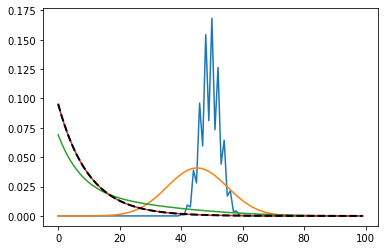

In [44]:
N = 100
M = np.zeros([N,N])
a = 10/N
pR = 0.5*np.exp(-a)
pL = 0.5
pS = 1.0 - pR - pL

for i in range(N):
    M[i,(i + 1)%N] = pR
    M[i,(i-1)%N] = pL
    M[i,i] = pS

ns = np.array([i for i in range(N)])
C = 1.0/np.sum(np.exp(-a*ns))
ys = C*np.exp(-a*ns)
    
M[0,N-1] = np.exp(-a*(N-1))
M[N-1,0] = pL
M[0,0] = 1 - M[0,N-1] - M[0,1]
M[N-1,N-1] = 1 - M[N-1,0] - M[N-1, N-2]

times = [10, 10**2, 10**3, 10**4]
NT = len(times)

vecs  = np.zeros([N,NT])
vecs0 = np.matrix(np.zeros([1, N]))
i0 = N//2
vecs0[0, i0] = 1.0

for i in range(NT):
    vecs[:,i] = vecs0*np.matrix(M)**times[i]

for i in range(NT):
    plt.plot(vecs[:,i])
    
plt.plot(ns, ys, 'k--', linewidth=2)
plt.show()

# Problema 3 - Balanço detalhado e algoritmo de Metropolis
No problema anterior, verificou-se que uma escolha específica de elementos de matriz, permitiu desenhar uma dinâmica de Markov com uma distribuição de equilíbrio exponencial. Isto pode ser expandido para qualquer distribuição, bastando saber que elementos escolher para a matriz de Markov. Aqui vamos explorar uma maneira de o fazer. A condição de balanço detalhado 
$$\Pi_n M_{nm}=\Pi_m M_{mn} $$
garante que, se $\mathbb{M}$ for ergódica, $\mathbb{M}$ dará origem à distribuição de equilíbrio $\mathbf{\Pi}$. Esta condição adicional à dinâmica de Markov é um ingrediente fulcral para construir o algoritmo de Metropolis.<br><br>

Um passo de Metropolis pode ser visto como um passo de uma dinâmica Markoviana (de matriz $\mathbb{M}$) especificamente desenhada. Os elementos de $\mathbb{M}$ são então divididos no passo de proposta e no passo de aceitação/Recusa. No primeiro passo, se o sistema estiver na posição $m$, a sua próxima posição, $n$, será determinada por uma distribuição $P_{nm}$. A nova posição pode (ou não) ser aceite, com uma determinada probabilidade $A_{nm}$ dada por

$$ A_{nm}=\min\left(1,\frac{\Pi_m P_{mn}}{\Pi_n P_{nm}}\right) $$
e os elementos de matriz de $\mathbb{M}$ são $M_{nm}=P_{nm}A_{nm}$. Existe imensa flexibilidade para a escolha de $P_{nm}$, uma vez que a distribuição de equilíbrio $\Pi$ é garantida por $A_{nm}$.<br><br>
1.Mostre que a matriz de Markov $\mathbb{M}$ assim definida satisfaz a condição de balanço detalhado para qualquer distribuição de equilíbrio $\mathbf{\Pi}$.

**Resposta:** Sabemos que
    
$$\Pi_{n}M_{nm}=\Pi_{n}P_{nm}A_{nm}=\Pi_{n}P_{nm}\min\left(1,\frac{\Pi_{m}P_{mn}}{\Pi_{n}P_{nm}}\right)=\min\left(\Pi_{n}P_{nm},\Pi_{m}P_{mn}\right)=\min\left(\Pi_{m}P_{mn},\Pi_{n}P_{nm}\right)$$

Se trocarmos $n$ por $m$, o ponto de chegada é o mesmo, logo

$$\Pi_{n}M_{nm}=\Pi_{m}M_{mn}$$

2. Usando $\Pi_n=C \exp\left(-n\lambda\right)$ e $P_{nm}=\frac{1}{2}\delta_{n,m+1}+\frac{1}{2}\delta_{n,m-1}$ mostre que a matriz $\mathbb{M}$ obtida é idêntica à do problema anterior. Considere que $P_{0,N-1} = 1/2$  e  $P_{N-1,0} = 1/2$

**Resposta:** Sabemos que a matriz $P$ é dada por

$$ P_{n,n+1}=P_{n,n-1}=P_{0,N-1}=P_{N-1,0}=\frac{1}{2} $$

e é zero nos elementos restantes. Usando isto, podemos calcular a matriz $A$ para cada um dos casos:

$$ A_{n,n+1}=\min\left(1,\frac{\Pi_{n+1}P_{n+1,n}}{\Pi_{n}P_{n,n+1}}\right)=\min\left(1,\frac{\Pi_{n+1}}{\Pi_{n}}\right)=\min\left(1,\frac{C\exp\left(-\lambda\left(n+1\right)\right)}{C\exp\left(-\lambda n\right)}\right)=\min\left(1,\exp\left(-\lambda\right)\right)=\exp\left(-\lambda\right) $$

$$ A_{n,n-1}=\min\left(1,\frac{\Pi_{n-1}P_{n-1,n}}{\Pi_{n}P_{n,n-1}}\right)=\min\left(1,\frac{\Pi_{n-1}}{\Pi_{n}}\right)=\min\left(1,\frac{C\exp\left(-\lambda\left(n-1\right)\right)}{C\exp\left(-\lambda n\right)}\right)=\min\left(1,\exp\left(\lambda\right)\right) $$ 

$$ A_{0,N-1}=\min\left(1,\frac{\Pi_{N-1}P_{N-1,0}}{\Pi_{0}P_{0,N-1}}\right)=\min\left(1,\frac{\Pi_{N-1}}{\Pi_{0}}\right)=\min\left(1,\frac{C\exp\left(-\lambda\left(N-1\right)\right)}{C\exp\left(0\right)}\right)=\exp\left(-\lambda\left(N-1\right)\right) $$

$$ A_{N-1,0}=\min\left(1,\frac{\Pi_{0}P_{0,N-1}}{\Pi_{N-1}P_{N-1,0}}\right)=\min\left(1,\frac{\Pi_{0}}{\Pi_{N-1}}\right)=\min\left(1,\frac{C\exp\left(0\right)}{C\exp\left(-\lambda\left(N-1\right)\right)}\right)=\min\left(1,\exp\left(\lambda\left(N-1\right)\right)\right)=1 $$

<br> Finalmente, a matriz de Markov é calculada com $M_{nm}=A_{nm} P_{nm}$

$$ M_{n,n+1}=\frac{1}{2}\exp\left(-\lambda\right)=p_R$$

$$M_{n,n-1}=\frac{1}{2}=p_L$$

$$M_{0,N-1}=\frac{1}{2}\exp\left(-\lambda\left(N-1\right)\right)=p_c$$

$$M_{N-1,0}=\frac{1}{2}=p_L$$

3. Usando este método, encontre uma outra matriz $\mathbb{M}^{\prime}$ que dê origem à mesma distribuição de equilíbrio exponencial e demonstre isto numericamente.

**Resposta:** Uma alternativa simples é usar 
$$ P_{n,n+1}=P_{N-1,0}=\frac{2}{3}$$
$$ P_{0,N-1}=P_{n,n-1}=\frac{1}{3} $$
<br> O que dá origem à seguinte matriz de aceitação $A$

$$A_{n,n+1}=\frac{1}{2}\exp\left(-\lambda\right)$$

$$A_{n,n-1}=\min\left(1,2\exp\left(\lambda\right)\right)=1$$

$$A_{0,N-1}=\min\left(1,2\exp\left(-\lambda\left(N-1\right)\right)\right)$$

$$A_{N-1,0}=\min\left(1,\frac{1}{2}\exp\left(\lambda\left(N-1\right)\right)\right)$$

Como para este valor de $\lambda$ e $N$, $\frac{1}{2}\exp\left(\lambda\left(N-1\right)\right)>2$, podemos usar

$$A_{0,N-1}=2\exp\left(-\lambda\left(N-1\right)\right)$$

$$A_{N-1,0}=1$$



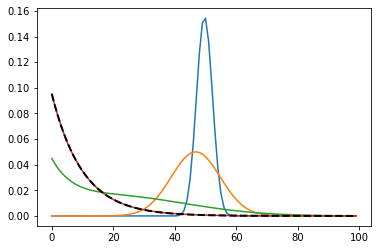

In [18]:
N = 100
M = np.zeros([N,N])
a = 10/N
pR = 1/2*np.exp(-a)*2/3
pL = 1/3
pS = 1.0 - pR - pL
pc = 2*np.exp(-a*(N-1))*1/3

for i in range(N):
    M[i,(i + 1)%N] = pR
    M[i,(i-1)%N] = pL
    M[i,i] = pS

ns = np.array([i for i in range(N)])
C = 1.0/np.sum(np.exp(-a*ns))
ys = C*np.exp(-a*ns)
    
M[0,N-1] = pc
M[N-1,0] = pL
M[0,0] = 1 - M[0,N-1] - M[0,1]
M[N-1,N-1] = 1 - M[N-1,0] - M[N-1, N-2]

times = [10, 10**2, 10**3, 10**4]
NT = len(times)

vecs  = np.zeros([N,NT])
vecs0 = np.matrix(np.zeros([1, N]))
i0 = N//2
vecs0[0, i0] = 1.0

for i in range(NT):
    vecs[:,i] = vecs0*np.matrix(M)**times[i]

for i in range(NT):
    plt.plot(vecs[:,i])
    
plt.plot(ns, ys, 'k--', linewidth=2)
plt.show()

4. 4. Isto justifica a utilização do algoritmo de Metropolis, em que a matriz de Markov é implicitamente implementada através de um passeio aleatório mas nunca precisa de ser calculada explicitamente. Para tal, considere uma partícula na posição $n=n_{0}$ a $t=0$. No instante seguinte, é feita uma proposta para que se mova para a esquerda ou para a direita, sendo qualquer resultado igualmente provável. Seja $m$ a posição proposta, que é aceite com uma probabilidade $A_{nm}$. Repetindo este processo várias vezes, faça o histograma das posições da partícula nos instantes $t=\left[0,10,20\right]\Delta t$ para $N=1000$ realizações deste independentes deste passeio aleatório. Compare com as conclusões do problema anterior.

**Resposta:**

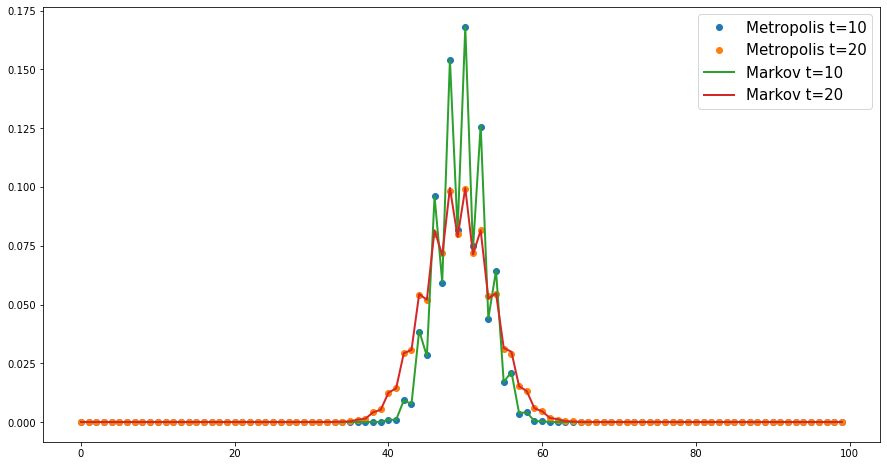

In [27]:
# Matriz de Markov
N = 100
M = np.zeros([N,N])
a = 10/N
pR = 0.5*np.exp(-a)
pL = 0.5
pS = 1.0 - pR - pL

for i in range(N):
    M[i,(i + 1)%N] = pR
    M[i,(i-1)%N] = pL
    M[i,i] = pS

ns = np.array([i for i in range(N)])
C = 1.0/np.sum(np.exp(-a*ns))
ys = C*np.exp(-a*ns)
    
M[0,N-1] = np.exp(-a*(N-1))
M[N-1,0] = pL
M[0,0] = 1 - M[0,N-1] - M[0,1]
M[N-1,N-1] = 1 - M[N-1,0] - M[N-1, N-2]

times = [10, 20, 10**2, 10**3, 10**4]
NT = len(times)

vecs  = np.zeros([N,NT])
vecs0 = np.matrix(np.zeros([1, N]))
i0 = N//2
vecs0[0, i0] = 1.0

for i in range(NT):
    vecs[:,i] = vecs0*np.matrix(M)**times[i]

    
    
# Dinâmica estocástica


NT = 21
NR = 100000
xs = np.zeros([NT, NR], dtype='int')
counts = np.zeros([N, NT])

lam = 10/N

ns = np.array([i for i in range(N)])
n0 = N//2
counts[n0,0] = NR

for i in range(NR):
    n = n0
    for t in range(NT-1):
        
        # proposal
        a = np.random.random()
        r = np.random.random()
        m = (n-1)%N
        if a < 0.5:
            m = (n+1)%N
            
        # acceptance
        b = min(np.exp(-(m-n)*lam), 1)
        if r < b:
            n = m
        xs[t+1,i] = n
        counts[n,t+1] += 1
    
    

fig, axs = plt.subplots(1,1)
axs.plot(ns,counts[:,10]/NR,'o', label="Metropolis t=10")
axs.plot(ns,counts[:,20]/NR,'o', label="Metropolis t=20")
axs.plot(vecs[:,0], linewidth=2, label="Markov t=10")
axs.plot(vecs[:,1], linewidth=2, label="Markov t=20")
fig.set_figheight(8)
fig.set_figwidth(15)
axs.legend(fontsize=15)
plt.show()

5. Para uma realização do passeio aleatório com $T=10^6$ iterações de Metropolis, usando os parâmetros da alínea anterior, faça o histograma das posições $i(t)$ que a partícula ocupou ao longo do tempo

**Resposta:**

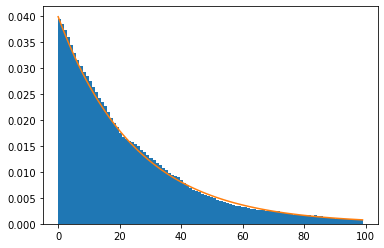

In [28]:
NT = 10**6
xs = np.zeros(NT)
lam = 0.04
n = 10
xs[0] = n

N = 100

for t in range(NT-1):
    a = np.random.random()
    r = np.random.random()
    m = (n-1)%N
    if a < 0.5:
        m = (n+1)%N
        
    b = min(np.exp(-(m-n)*lam), 1)
    if r < b:
        n = m
    xs[t+1] = n
    

ns = np.array([i for i in range(N)])
C = 1.0/np.sum(np.exp(-lam*ns))
ys = np.exp(-ns*lam)*C

plt.hist(xs, bins = 100, density=True)
plt.plot(ns, ys)
plt.show()

6. Para uma realização do passeio aleatório, calcule a correlação entre duas posições da partícula separadas temporalmente por $\tau$. 
$$ C\left(\tau\right)=\sum_{t=0}^{\infty}\frac{i\left(t+\tau\right)i\left(t\right)-\mu^{2}}{\sigma^{2}} $$ onde $\mu$ é a média da distribuição de equilíbrio e $\sigma$ é o desvio-padrão.

Faça uma estimativa para o tempo que é necessário ter passado para que duas posições estejam descorrelacionadas temporalmente.

**Resposta:** Depois de 3000 iterações, as posições estão bastante descorrelacionadas.

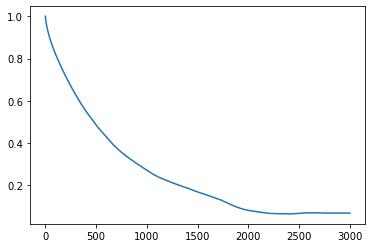

In [22]:
NTAU = 3000
corr = np.zeros(NTAU)

x1 = xs[:-NTAU]
NS = len(x1)
av = np.sum(x1)/NS
av2 = np.sum(x1*x1)/NS


for t in range(NTAU):
    x2 = xs[t:-NTAU+t]
    num = np.sum(x1*x2)/NS
    corr[t] = (num - av*av)/(av2 - av*av)
    corr[t] = num
plt.plot(corr)

7. Na alínea 5, verificou que se fizer o histograma das posições da partícula ao longo do tempo para **uma** realização do passeio aleatório, obtém novamente a distribuição de equilíbrio pretendida. Porquê? Justifique isto à luz da alínea 6.

**Resposta:** Como foi visto na alínea anterior, demora aproximadamente 3000 iterações para que as variáveis estejam descorrelacionadas, logo é como se a cada 3000 iterações tirássemos um novo número da distribuição, que segue uma distribuição exponencial. Logo, teremos efectivamente $10^6/3000$ variáveis aleatórias idênticas e independentes com as quais podemos fazer um histograma.
